In [14]:
import torch
from diffusers import AutoPipelineForInpainting
#from diffusers import StableDiffusionImg2ImgPipeline
#from diffusers import StableDiffusionXLImg2ImgPipeline
#from diffusers import StableDiffusionXLInpaintPipeline
from diffusers.utils import load_image, make_image_grid

In [21]:
pipeline = AutoPipelineForInpainting.from_pretrained(
    "E:/code work/aima/app/models/" , use_safetensors=True
)
pipeline = pipe.to(device)

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

OSError: Error no file named diffusion_pytorch_model.bin found in directory E:/code work/aima/app/models/.

In [ ]:
image_path = r'C:\Users\PC\OneDrive\Desktop\ex2.png'

# Display the image
Image(filename=image_path)

# try 2

## using cache file and SDXL 1.0

In [15]:
import torch
from diffusers import StableDiffusionXLInpaintPipeline
from diffusers.utils import load_image, make_image_grid

In [16]:
pipeline  = StableDiffusionXLInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True,
)
pipeline .to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLInpaintPipeline {
  "_class_name": "StableDiffusionXLInpaintPipeline",
  "_diffusers_version": "0.24.0.dev0",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "force_zeros_for_empty_prompt": true,
  "requires_aesthetics_score": false,
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [17]:
img = "C:\\Users\\PC\\OneDrive\\Desktop\\img.png"
init_image = load_image(img)  

mask = "C:\\Users\\PC\\OneDrive\\Desktop\\mask.png"
mask_image = load_image(mask)

In [18]:
prompt = "wearing a blue backpack"
image = pipeline(
    prompt=prompt, 
    image=init_image, 
    mask_image=mask_image, 
    num_inference_steps=50, 
    strength=0.80
).images[0]

  0%|          | 0/40 [00:00<?, ?it/s]

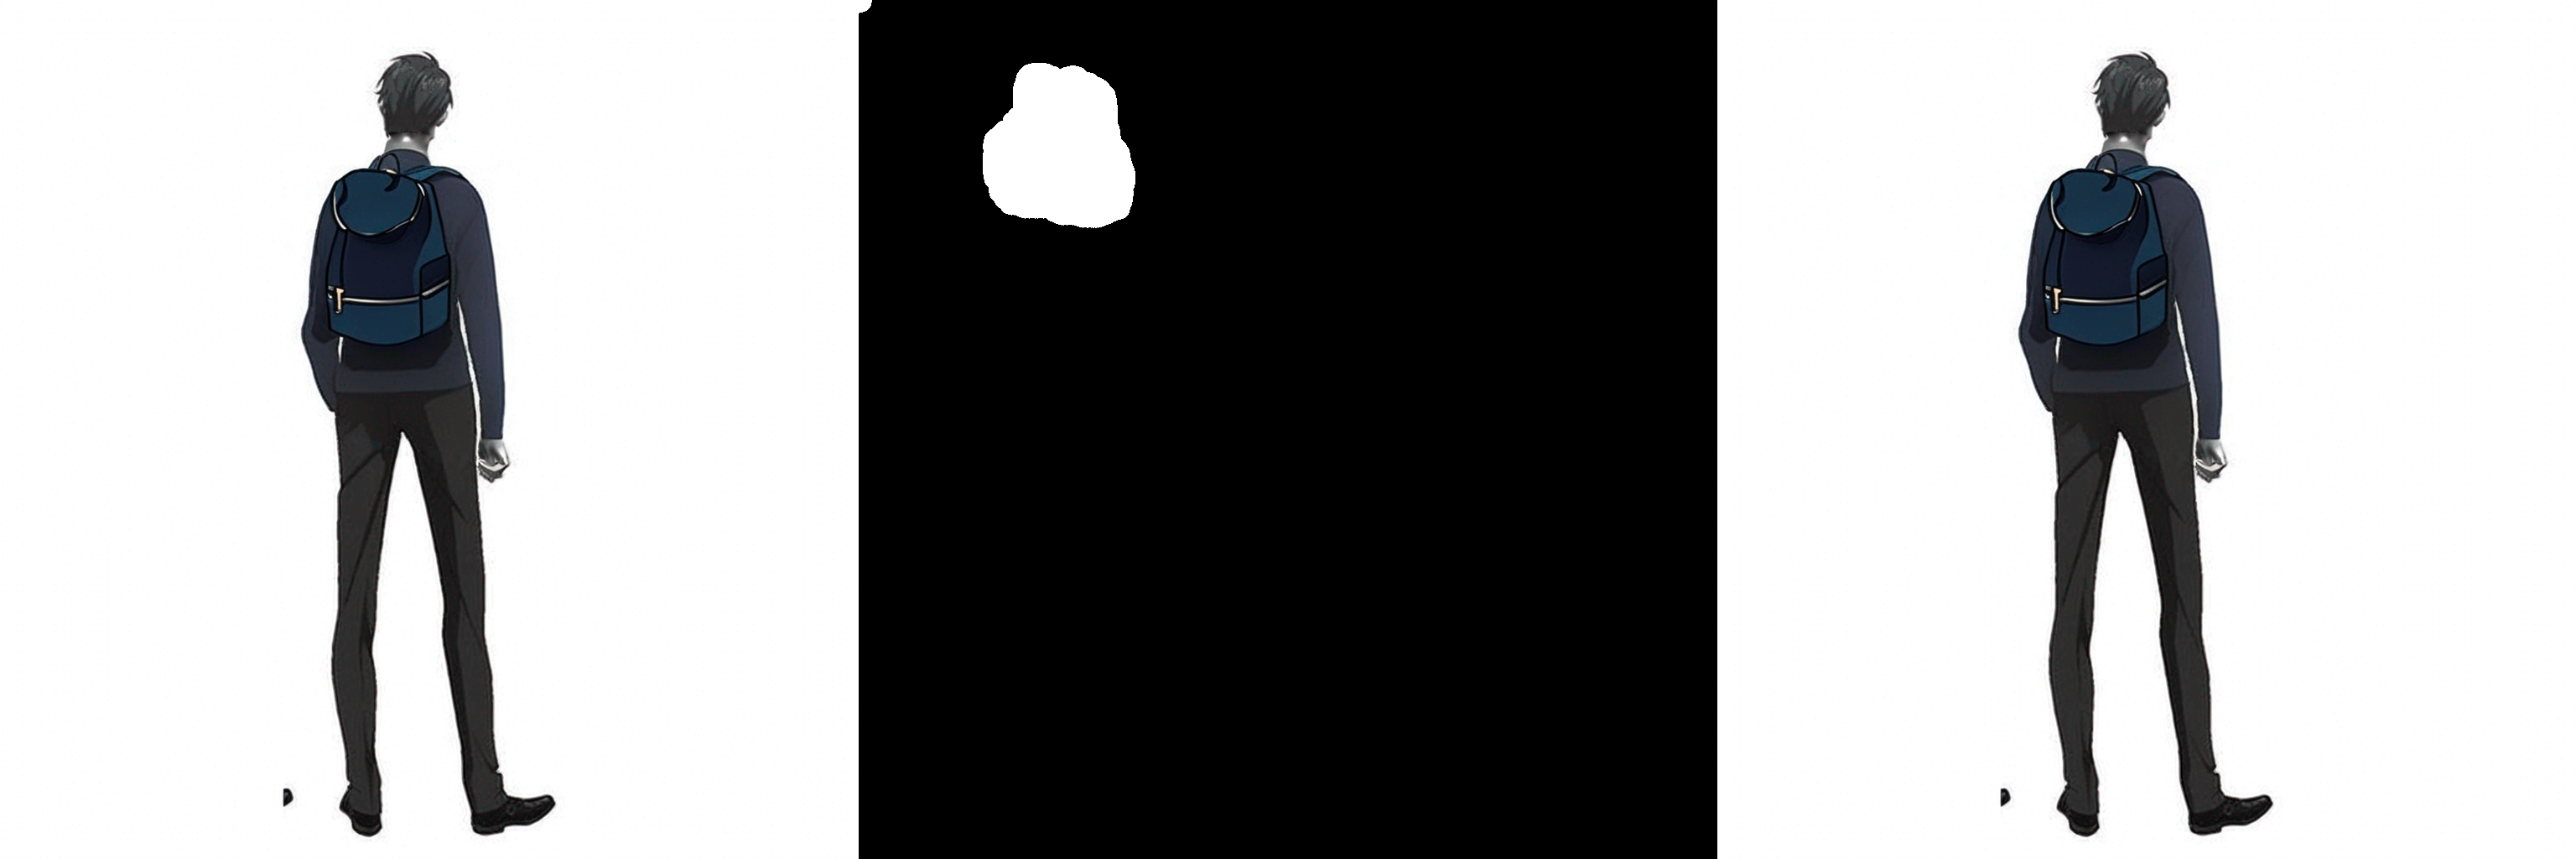

In [6]:
make_image_grid([image, mask_image, image], rows=1, cols=3)

In [10]:
prompt = "wearing a futuristic jetpack"
image = pipeline(
    prompt=prompt, 
    image=init_image, 
    mask_image=mask_image, 
    num_inference_steps=50, 
    strength=0.80
).images[0]

  0%|          | 0/40 [00:00<?, ?it/s]

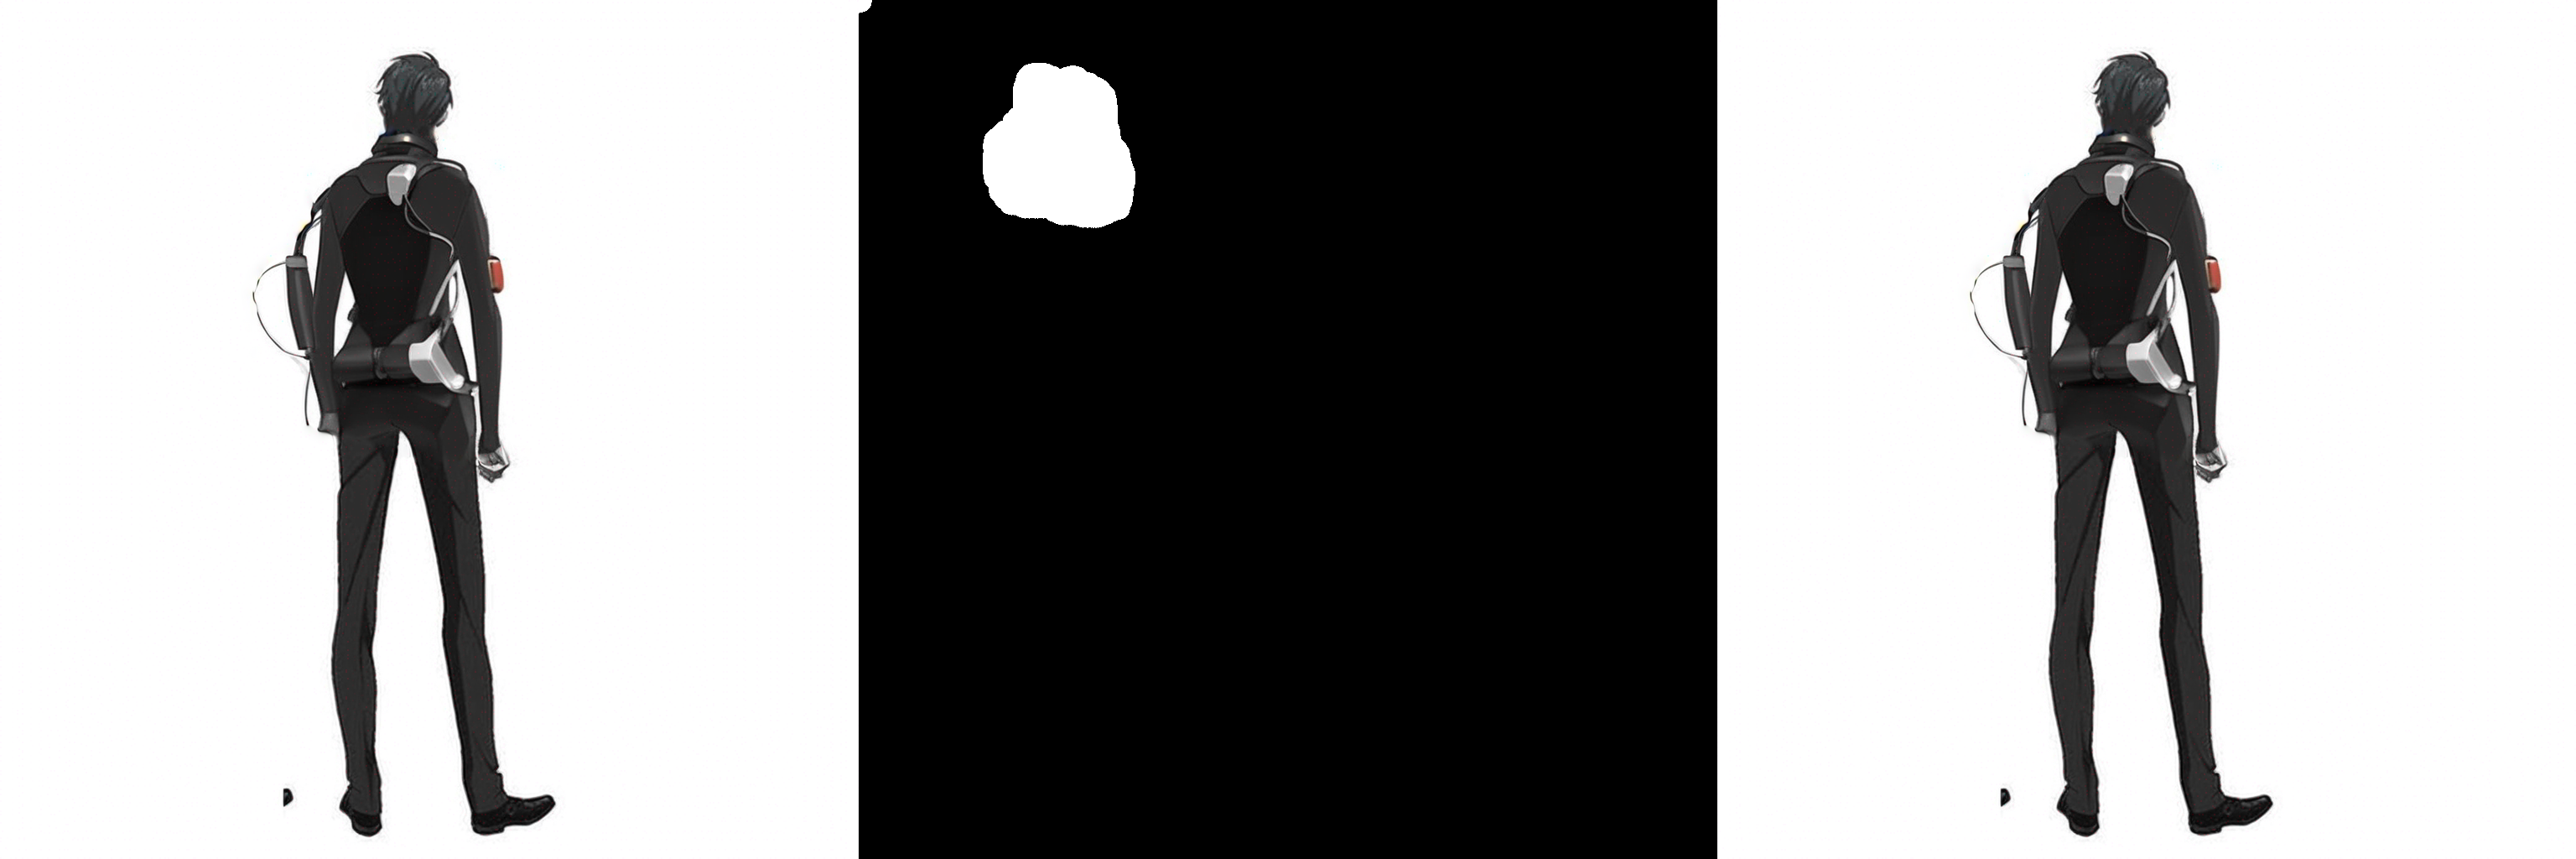

In [11]:
make_image_grid([image, mask_image, image], rows=1, cols=3)

## function implementation

In [20]:
# import torch
# from diffusers import StableDiffusionXLInpaintPipelinefrom diffusers.utils import load_image, make_image_grid

In [28]:

pipeline .to("cuda")
def inpaint(textprompt, init_image, mask_image):
    try: #if model is already loaded
        image = pipeline(
        prompt=textprompt, 
        image=init_image, 
        mask_image=mask_image, 
        num_inference_steps=50, 
        strength=0.80
        ).images[0]
        #print("enetred tried")
        
    except: #first time loadup
        pipeline  = StableDiffusionXLInpaintPipeline.from_pretrained(
        "stabilityai/stable-diffusion-xl-base-1.0",
        torch_dtype=torch.float16,
        variant="fp16",
        use_safetensors=True,
        )
        pipeline .to("cuda")

        image = pipeline(
            prompt=textprompt, 
            image=init_image, 
            mask_image=mask_image, 
            num_inference_steps=50, 
            strength=0.80
        ).images[0]
        #print("enetred except")
    
    return image

In [31]:
textprompt= "wearing a futuristic jetpack"

img = "C:\\Users\\PC\\OneDrive\\Desktop\\img.png"
init_image = load_image(img)  
mask = "C:\\Users\\PC\\OneDrive\\Desktop\\mask.png"
mask_image = load_image(mask)

inpaint_img= inpaint(textprompt, init_image, mask_image)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

enetred except


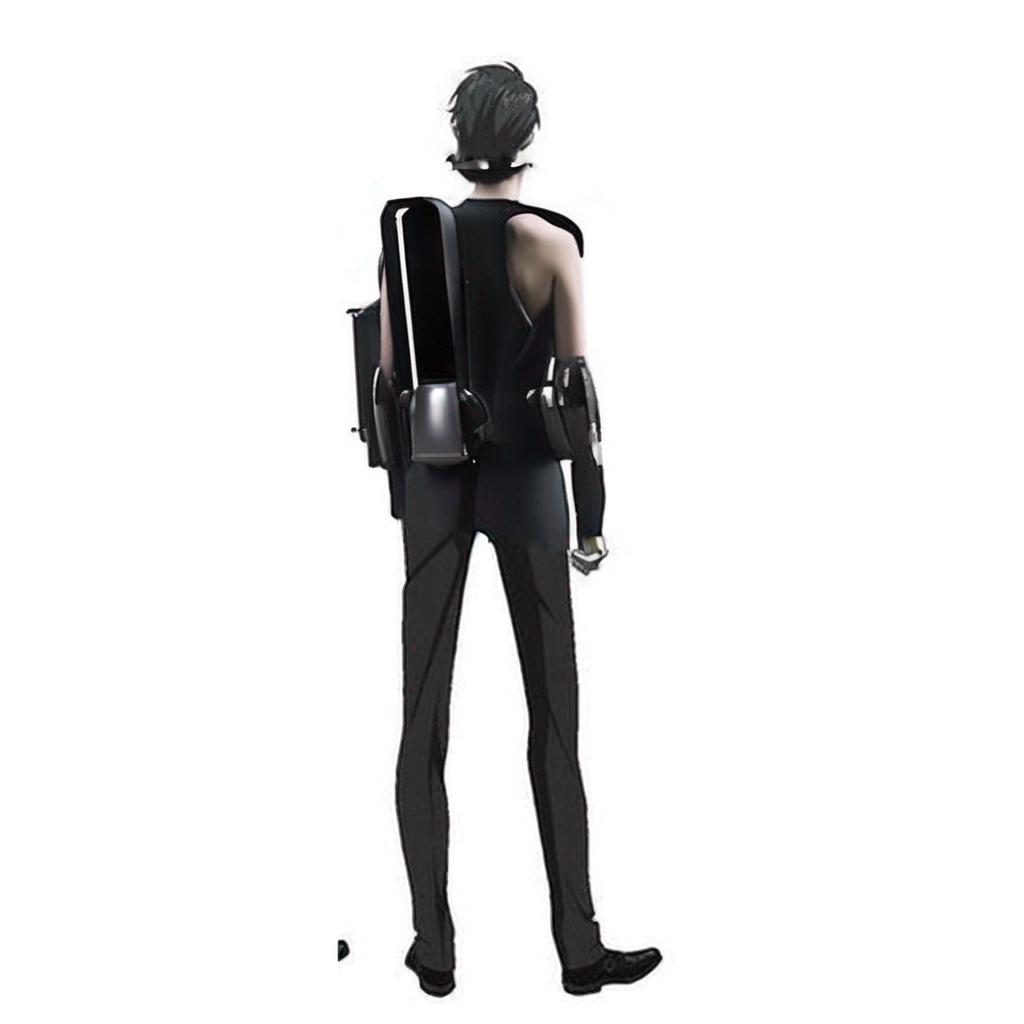

In [32]:
inpaint_img